In [3]:
# Import libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
# Read image
src_image = cv.imread("Einstein.jpg")
# Convert to grayscale
src_image_gray = cv.cvtColor(src_image, cv.COLOR_BGR2GRAY)
# Resize color and grayscale image to (row / 4, col / 4) to visualize easier
row = src_image.shape[0]
row /= 4
row = int(row)
col = src_image.shape[1]
col /= 4
col = int(col)
src_image = cv.resize(src_image, (row, col))
src_image_gray = cv.resize(src_image_gray, (row, col))

# Create image in RGB color scheme to plot using matplotlib
src_image_mat = cv.cvtColor(src_image, cv.COLOR_BGR2RGB)


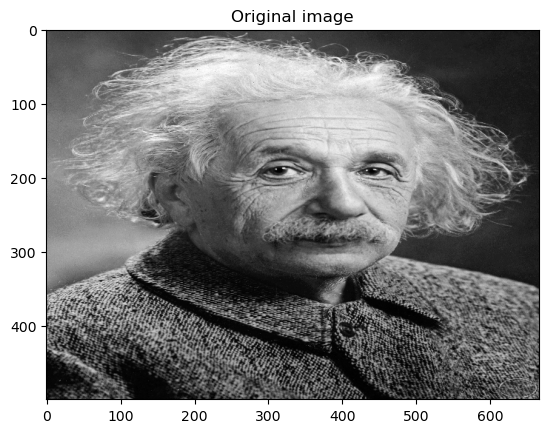

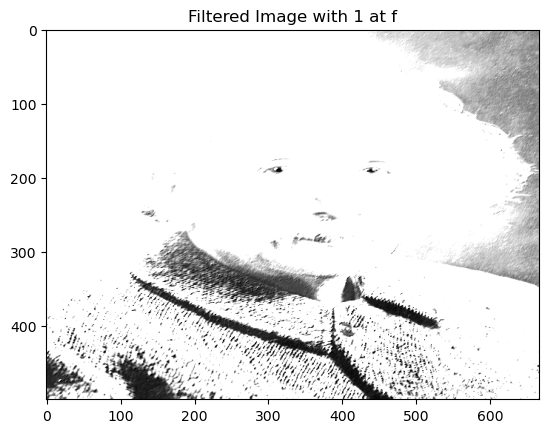

In [4]:
kernel = np.array([
    [-1, -1, 2],
    [-1, 2, 1],
    [2, 1, 1]
])

result_f = cv.filter2D(src_image_gray, -1,kernel) 

plt.imshow(src_image_gray, cmap = 'gray')
plt.title("Original image")
plt.show()

plt.imshow(result_f, cmap = 'gray')
plt.title("Filtered Image with 1 at f")
plt.show()

In [2]:
# Crop image to use for filters with 1 at d and c
cropped_src_image = src_image[150 : 250, 250 :  350]
cropped_src_image_mat = src_image_mat[150 : 250, 250 :  350]

In [3]:
# Function that applies filter for grayscale images
def apply_filter_gray(image, kernel, num_apply):
    # Padding to ensure that output image is the same size as input image
    padded_image = np.pad(image, pad_width = num_apply)
    result = np.zeros((padded_image.shape[0], padded_image.shape[1]))
    # Loop over pixels corresponding to the input image
    for i in range(num_apply, image.shape[0] + num_apply):
        for j in range(num_apply, image.shape[1] + num_apply):
            result[i, j] = ((kernel[0][0] * padded_image[i - 1, j - 1] + kernel[0][1] * padded_image[i - 1, j ] + kernel[0][2] * padded_image[i -1, j +1 ] + 
                               kernel[1][0] * padded_image[i, j - 1 ] + kernel[1][1] * padded_image[i, j ] + kernel[1][2] * padded_image[i, j +1 ] +
                               kernel[2][0] * padded_image[i + 1, j - 1 ] + kernel[2][1] * padded_image[i + 1, j ] + kernel[2][2] * padded_image[i + 1, j + 1 ]))
    # Apply the filter multiple times
    if (num_apply > 1):
        for k in range(num_apply - 1):
            for i in range(num_apply, image.shape[0] + num_apply):
                for j in range(num_apply, image.shape[1] + num_apply):
                    result[i, j ] = ((kernel[0][0] * result[i - 1, j - 1 ] + kernel[0][1] * result[i - 1, j ] + kernel[0][2] * result[i -1, j +1 ] + 
                                kernel[1][0] * result[i, j - 1 ] + kernel[1][1] * result[i, j ] + kernel[1][2] * result[i, j +1 ] +
                                kernel[2][0] * result[i + 1, j - 1 ] + kernel[2][1] * result[i + 1, j ] + kernel[2][2] * result[i + 1, j +1 ]))
    # Conversion from float to 8 bit integer
    result = result.astype(np.uint8)
    # Cropping the result to match the input image
    result = result[num_apply : image.shape[0] + num_apply, num_apply : image.shape[1] + num_apply]
    return result    

In [4]:
# Function that applies filter for color images
# Identical to the grayscale function except that it operates on 3D arrays and not 2D
def apply_filter_color(image, kernel, num_apply):
    padded_image = np.pad(image, ((num_apply, num_apply), (num_apply, num_apply), (0, 0)), 'constant')
    result = np.zeros((padded_image.shape[0], padded_image.shape[1], padded_image.shape[2]))
    for i in range(num_apply, image.shape[0] + num_apply):
        for j in range(num_apply, image.shape[1] + num_apply):
            result[i, j, : ] = ((kernel[0][0] * padded_image[i - 1, j - 1, : ] + kernel[0][1] * padded_image[i - 1, j , : ] + kernel[0][2] * padded_image[i -1, j +1 , : ] + 
                               kernel[1][0] * padded_image[i, j - 1 , : ] + kernel[1][1] * padded_image[i, j , : ] + kernel[1][2] * padded_image[i, j +1 , : ] +
                               kernel[2][0] * padded_image[i + 1, j - 1 , : ] + kernel[2][1] * padded_image[i + 1, j , : ] + kernel[2][2] * padded_image[i + 1, j +1 , : ]))
    if (num_apply > 1):
        for k in range(num_apply - 1):
            for i in range(num_apply, image.shape[0] + num_apply):
                for j in range(num_apply, image.shape[1] + num_apply):
                    result[i, j, : ] = ((kernel[0][0] * result[i - 1, j - 1 , : ] + kernel[0][1] * result[i - 1, j , : ] + kernel[0][2] * result[i -1, j + 1 , : ] + 
                                kernel[1][0] * result[i, j - 1 , : ] + kernel[1][1] * result[i, j , : ] + kernel[1][2] * result[i, j + 1 , : ] +
                                kernel[2][0] * result[i + 1, j - 1 , : ] + kernel[2][1] * result[i + 1, j , : ] + kernel[2][2] * result[i + 1, j + 1 , : ]))
    result = result.astype(np.uint8)
    result = result[num_apply : image.shape[0] + num_apply, num_apply : image.shape[1] + num_apply,  : ]
    return result    

In [5]:
# Function that applies filter for color images for float values
def apply_filter_color_float(image, kernel, num_apply):
    padded_image = np.pad(image, ((num_apply, num_apply), (num_apply, num_apply), (0, 0)), 'constant')
    result = np.zeros((padded_image.shape[0], padded_image.shape[1], padded_image.shape[2]))
    for i in range(num_apply, image.shape[0] + num_apply):
        for j in range(num_apply, image.shape[1] + num_apply):
            result[i, j, : ] = ((kernel[0][0] * padded_image[i - 1, j - 1, : ] + kernel[0][1] * padded_image[i - 1, j , : ] + kernel[0][2] * padded_image[i -1, j +1 , : ] + 
                               kernel[1][0] * padded_image[i, j - 1 , : ] + kernel[1][1] * padded_image[i, j , : ] + kernel[1][2] * padded_image[i, j +1 , : ] +
                               kernel[2][0] * padded_image[i + 1, j - 1 , : ] + kernel[2][1] * padded_image[i + 1, j , : ] + kernel[2][2] * padded_image[i + 1, j +1 , : ]))
    if (num_apply > 1):
        for k in range(num_apply - 1):
            for i in range(num_apply, image.shape[0] + num_apply):
                for j in range(num_apply, image.shape[1] + num_apply):
                    result[i, j, : ] = ((kernel[0][0] * result[i - 1, j - 1 , : ] + kernel[0][1] * result[i - 1, j , : ] + kernel[0][2] * result[i -1, j + 1 , : ] + 
                                kernel[1][0] * result[i, j - 1 , : ] + kernel[1][1] * result[i, j , : ] + kernel[1][2] * result[i, j + 1 , : ] +
                                kernel[2][0] * result[i + 1, j - 1 , : ] + kernel[2][1] * result[i + 1, j , : ] + kernel[2][2] * result[i + 1, j + 1 , : ]))
    result = result[num_apply : image.shape[0] + num_apply, num_apply : image.shape[1] + num_apply,  : ]
    return result    

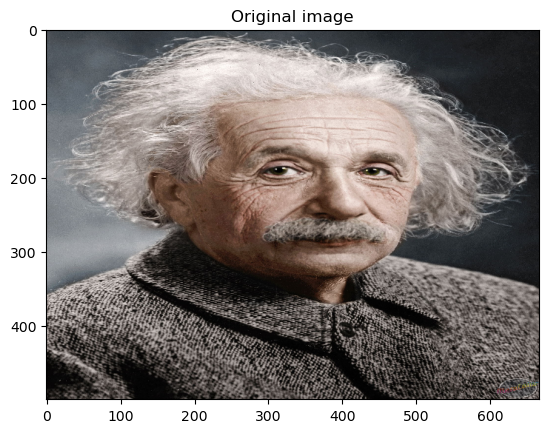

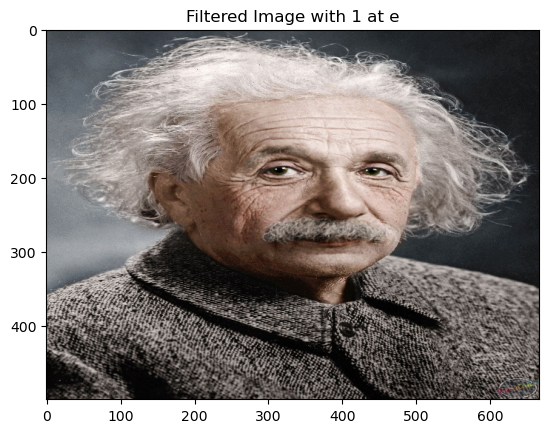

In [6]:
# Cell that applies the filter with 1 at e
kernel_e = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
])
# Applying the function
# result_e is in BGR format and can be displayed using cv.imshow
# result_e_mat is in RGB format and is displayed using maplotlib.pylot imshow function

# result_e = apply_filter_color(src_image, kernel_e, 1)
result_e_mat = apply_filter_color(src_image_mat, kernel_e, 1)

plt.imshow(src_image_mat)
plt.title("Original image")
plt.show()
plt.title("Filtered Image with 1 at e")
plt.imshow(result_e_mat)
plt.show()
#cv.imshow("Original Image", src_image)
#cv.imshow("filtered image with 1 at e", result_e)
#cv.waitKey(10000)
#cv.destroyAllWindows()

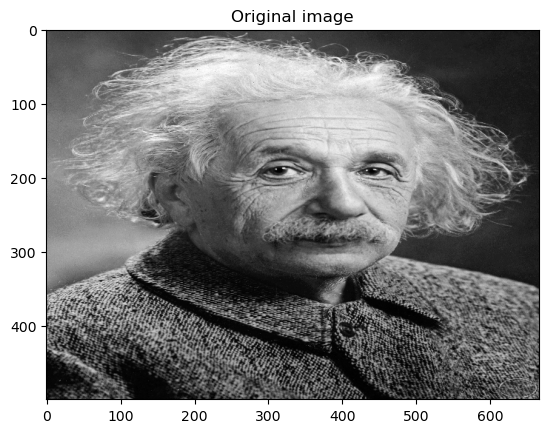

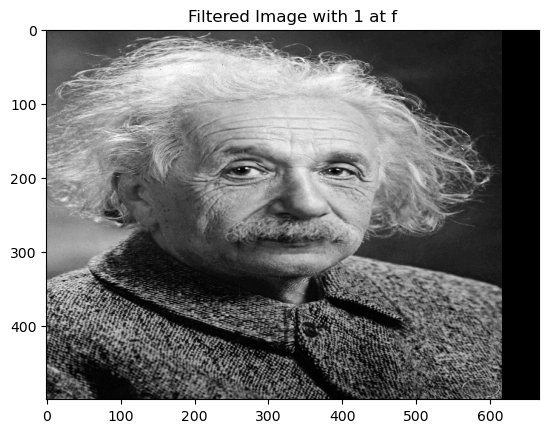

In [7]:
# Cell that applies the filter with 1 at f
kernel_f = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 0, 0]
])
# Applying the function
# result_f is in grayscale format and can be displayed using either function

result_f = apply_filter_gray(src_image_gray, kernel_f, 50) 

plt.imshow(src_image_gray, cmap = 'gray')
plt.title("Original image")
plt.show()

plt.imshow(result_f, cmap = 'gray')
plt.title("Filtered Image with 1 at f")
plt.show()
#cv.imshow("Original Image", src_image)
#cv.imshow("filtered image with 1 at f", result_f)
#cv.waitKey(20000)
#cv.destroyAllWindows()


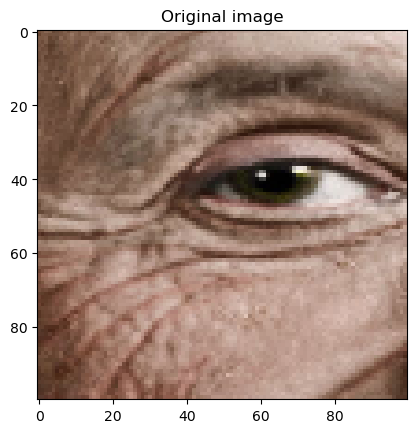

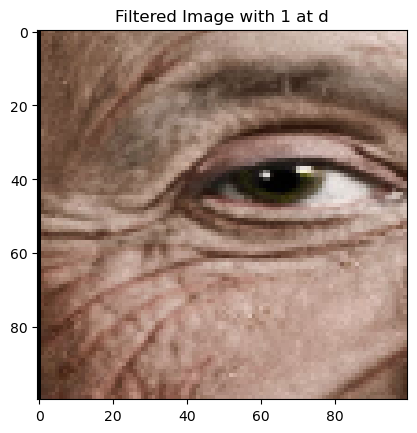

In [8]:
# Cell that applies the filter with 1 at d

kernel_d = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [0, 0, 0]
])

# Applying the function
# result_d is in BGR format and can be displayed using cv.imshow
# result_d_mat is in RGB format and is displayed using maplotlib.pylot imshow function

# result_d = apply_filter_color(cropped_src_image, kernel_d, 1)
result_d_mat = apply_filter_color(cropped_src_image_mat, kernel_d, 1)

plt.imshow(cropped_src_image_mat)
plt.title("Original image")
plt.show()

plt.imshow(result_d_mat)
plt.title("Filtered Image with 1 at d")
plt.show()

#cv.imshow("Original Image", src_image)
#cv.imshow("filtered image with 1 at f", result_d)
#cv.waitKey(20000)
#cv.destroyAllWindows()


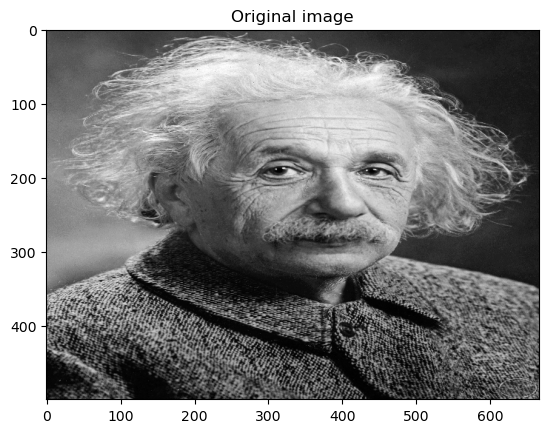

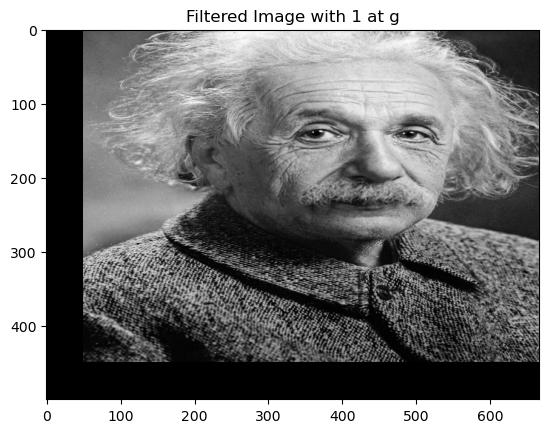

In [9]:
# Cell that applies the filter with 1 at g

kernel_g = np.array([
    [0, 0, 0],
    [0, 0, 0],
    [1, 0, 0]
])

# Applying the function
# result_g is in grayscale format and can be displayed using either function

result_g = apply_filter_gray(src_image_gray, kernel_g, 50) 
plt.imshow(src_image_gray, cmap = 'gray')
plt.title("Original image")
plt.show()

plt.title("Filtered Image with 1 at g")
plt.imshow(result_g, cmap = 'gray')
plt.show()
#cv.imshow("Original Image", src_image)
#cv.imshow("filtered image with 1 at g", result_g)
#cv.waitKey(20000)
#cv.destroyAllWindows()

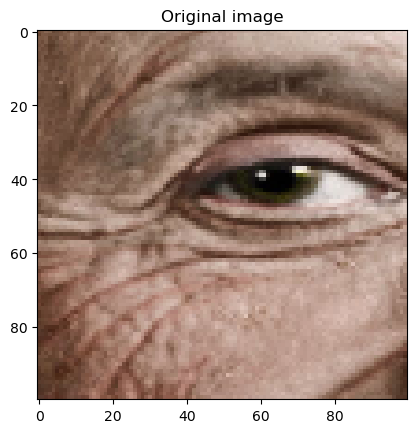

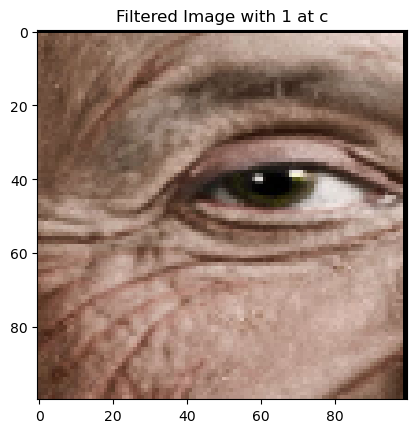

In [10]:
# Cell that applies the filter with 1 at c

kernel_c = np.array([
    [0, 0, 1],
    [0, 0, 0],
    [0, 0, 0]
])

# Applying the function
# result_c is in BGR format and can be displayed using cv.imshow
# result_c_mat is in RGB format and is displayed using maplotlib.pylot imshow function

#result_c = apply_filter_color(cropped_src_image, kernel_c, 1)
result_c_mat = apply_filter_color(cropped_src_image_mat, kernel_c, 1)

plt.imshow(cropped_src_image_mat)
plt.title("Original image")
plt.show()

plt.title("Filtered Image with 1 at c")
plt.imshow(result_c_mat)
plt.show() 
#cv.imshow("Original Image", src_image)
#cv.imshow("filtered image with 1 at c", result_c)
#cv.waitKey(20000)
#cv.destroyAllWindows()

In [11]:
# Define filters for horizontal and vertical edge detection (Q2)
vertical_edge_detection = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])
horizontal_edge_detection = vertical_edge_detection.T
# Convert image to floating point to prevent information loss when applying the filter
src_image_2 = src_image.astype(np.float32)

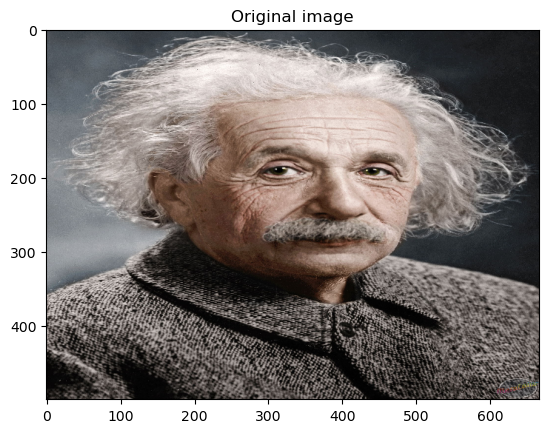

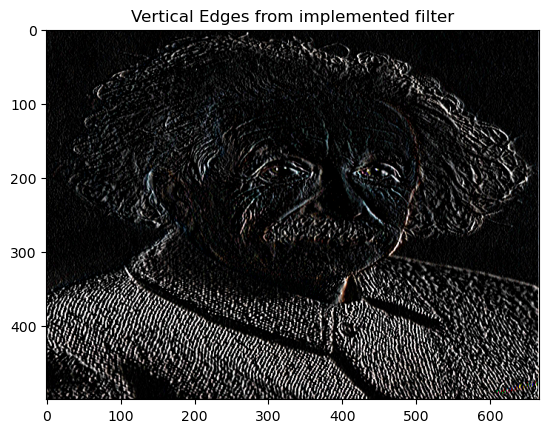

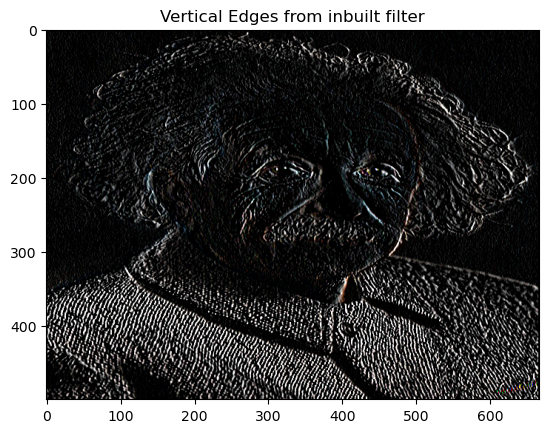

In [12]:
# Cell that applies filters to compute vertical edges

# Application using cv.filter2D to compare results
v_edge = cv.filter2D(src_image, -1, vertical_edge_detection)
# Application using implemented filter
vertical_edge = apply_filter_color_float(src_image_2, vertical_edge_detection, 1) 
# Clipping values between 0 and 255, and converting to unsigned 8 bit integer
vertical_edge = np.clip(vertical_edge, 0.0, 255.0)
vertical_edge = vertical_edge.astype(np.uint8)

result_vertical_edge_mat = cv.cvtColor(vertical_edge, cv.COLOR_BGR2RGB)
comp_vertical_edge_mat = cv.cvtColor(v_edge, cv.COLOR_BGR2RGB)

plt.imshow(src_image_mat)
plt.title("Original image")
plt.show()

plt.imshow(result_vertical_edge_mat)
plt.title("Vertical Edges from implemented filter")
plt.show()

plt.imshow(comp_vertical_edge_mat)
plt.title("Vertical Edges from inbuilt filter")
plt.show()
#cv.imshow("Original Image", src_image)
#cv.imshow("Vertical Edges", vertical_edge)
#cv.imshow("Comp", v_edge)
#cv.waitKey(20000)
#cv.destroyAllWindows()

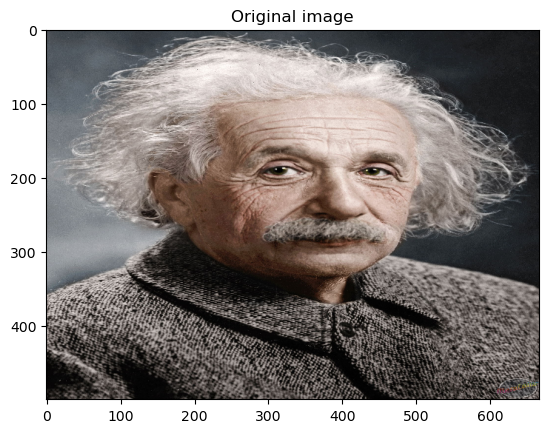

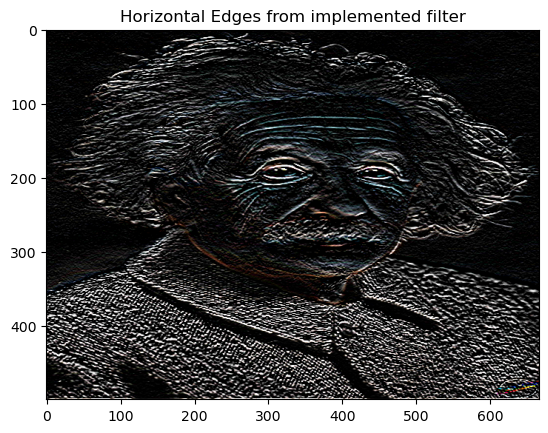

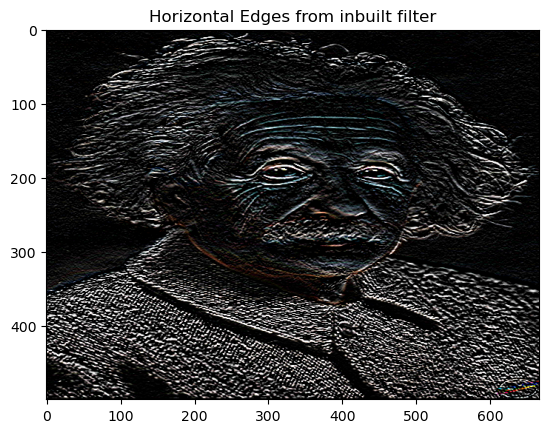

In [16]:
# Cell that applies filters to compute vertical edges

# Application using implemented filter
horizontal_edge = apply_filter_color_float(src_image_2, horizontal_edge_detection, 1) 
# Clipping values between 0 and 255, and converting to unsigned 8 bit integer
horizontal_edge = np.clip(horizontal_edge, 0.0, 255.0)
horizontal_edge = horizontal_edge.astype(np.uint8)

# Application using cv.filter2D to compare results
h_edge = cv.filter2D(src_image, -1, horizontal_edge_detection)

result_horizontal_edge_mat = cv.cvtColor(horizontal_edge, cv.COLOR_BGR2RGB)
comp_horizontal_edge_mat = cv.cvtColor(h_edge, cv.COLOR_BGR2RGB)

plt.imshow(src_image_mat)
plt.title("Original image")
plt.show()

plt.imshow(result_horizontal_edge_mat)
plt.title("Horizontal Edges from implemented filter")
plt.show()

plt.imshow(comp_horizontal_edge_mat)
plt.title("Horizontal Edges from inbuilt filter")
plt.show()

#cv.imshow("Original Image", src_image)
#cv.imshow("Horizontal edges", horizontal_edge)
#cv.imshow("Comp", h_edge)
#cv.waitKey(10000)
#cv.destroyAllWindows()

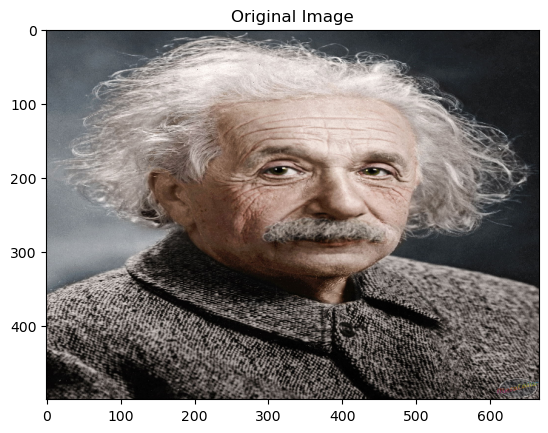

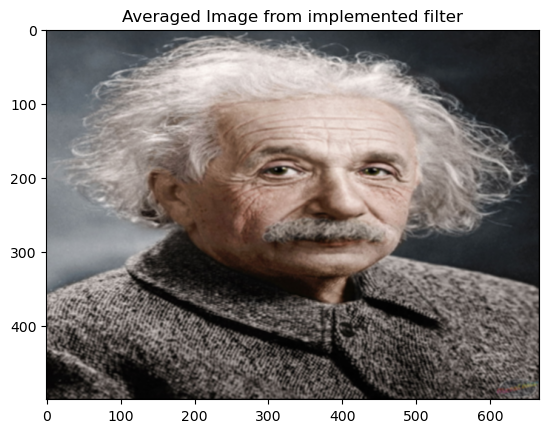

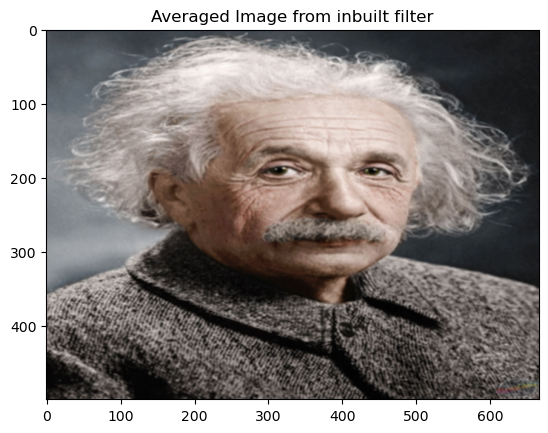

In [14]:
# Cell that applies average (box) filter

average = (1 / 9) * np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

# Applying the functions. We apply cv.filter2D to compare with our implementation
# averaged and average_comp are in BGR format and can be displayed using cv.imshow
# result_averaged_mat and comp_averaged_mat are in RGB format and are displayed using maplotlib.pylot imshow function

averaged = apply_filter_color(src_image, average, 1) 
average_comp = cv.filter2D(src_image, -1, average)

result_averaged_mat = cv.cvtColor(averaged, cv.COLOR_BGR2RGB)
comp_averaged_mat = cv.cvtColor(average_comp, cv.COLOR_BGR2RGB)

plt.imshow(src_image_mat)
plt.title("Original Image")
plt.show()

plt.imshow(result_averaged_mat)
plt.title("Averaged Image from implemented filter")
plt.show()

plt.imshow(comp_averaged_mat)
plt.title("Averaged Image from inbuilt filter")
plt.show()

#cv.imshow("Original Image", src_image)
#cv.imshow("Averaged Image", averaged)
#cv.waitKey(20000)
#cv.destroyAllWindows()

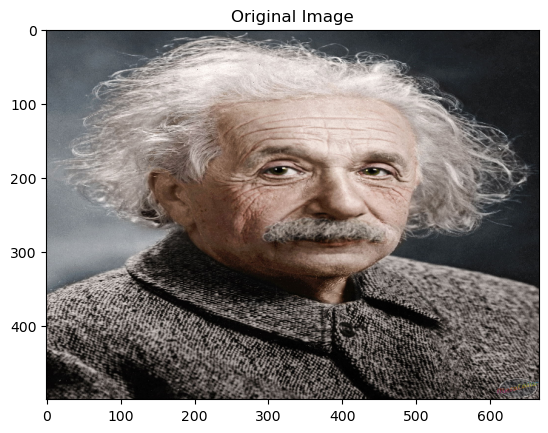

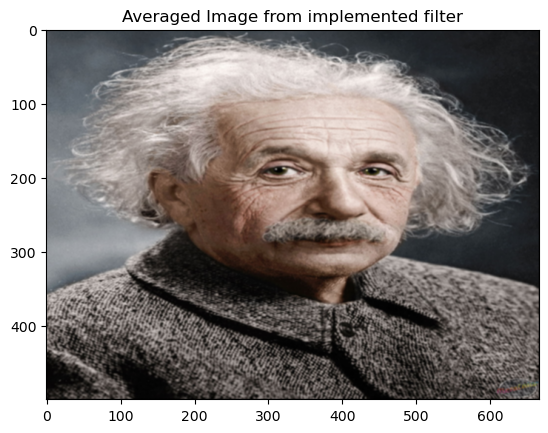

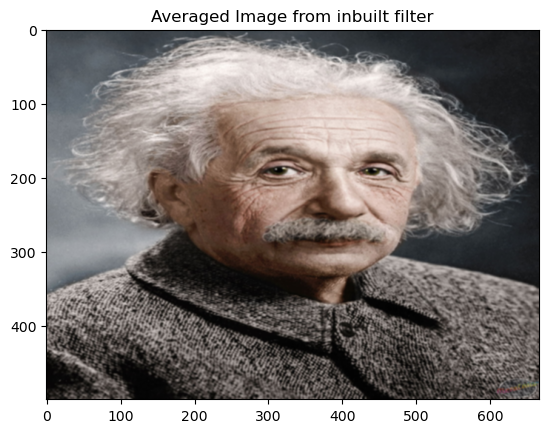

In [15]:
# Cell that applies Gaussian filter
# Code to initialize the Gaussian filter 
gaussian = np.zeros((3, 3))
sigma = 1
for i in range (3):
    for j in range(3):
        x = i - 1
        y = j - 1
        gaussian[i, j] = np.exp((-(x ** 2 + y ** 2) / (2 * sigma ** 2)))
# Normalizing the filter
gaussian /= np.sum(gaussian)

# Applying the functions. We apply cv.filter2D to compare with our implementation
# gaussian_im and gauss_img are in BGR format and can be displayed using cv.imshow
# result_gauss_mat and comp_gauss_mat are in RGB format and are displayed using maplotlib.pylot imshow function

gaussian_im = cv.GaussianBlur(src_image, (3, 3), 1)
gauss_img = apply_filter_color(src_image, gaussian, 1) 

result_gauss_mat = cv.cvtColor(gauss_img, cv.COLOR_BGR2RGB)
comp_gauss_mat = cv.cvtColor(gaussian_im, cv.COLOR_BGR2RGB)

plt.imshow(src_image_mat)
plt.title("Original Image")
plt.show()

plt.imshow(result_gauss_mat)
plt.title("Averaged Image from implemented filter")
plt.show()

plt.imshow(comp_gauss_mat)
plt.title("Averaged Image from inbuilt filter")
plt.show()

#cv.imshow("Original Image", src_image)
#cv.imshow("Gaussian Blurred Image with explicit filter", gauss_img)
#cv.imshow("Gaussian inbuilt", gaussian_im)
#cv.waitKey(30000)
#cv.destroyAllWindows()